In [ ]:
# x1, y1, w, h, blur, expression, illumination, invalid, occlusion, pose

In [3]:
import os
import json
import cv2
from matplotlib import pyplot as plt
from dataset import read_wider_meta

from utils import letterbox_pad

### Calculate and write meta

In [2]:
data_root = './data/'

# calculate
# train_meta = read_wider_meta(data_root, phase='train')
# val_meta = read_wider_meta(data_root, phase='val')
# test_meta = read_wider_meta(data_root, phase='test')

# write
# with open('./data/train.json', 'w') as fwrite:
#     json.dump(train_meta, fwrite)
    
# with open('./data/val.json', 'w') as fwrite:
#     json.dump(val_meta, fwrite)

# with open('./data/test.json', 'w') as fwrite:
#     json.dump(test_meta, fwrite)

### Read meta

In [4]:
with open('./data/train.json', 'r') as fread:
    train_meta = json.load(fread)
    
with open('./data/val.json', 'r') as fread:
    val_meta = json.load(fread)
    
with open('./data/test.json', 'r') as fread:
    test_meta = json.load(fread)

In [60]:
val_meta['1131']

{'full_file_path': './data/WIDER_val/images/23--Shoppers/23_Shoppers_Shoppers_23_259.jpg',
 'size_HW': [787, 1024],
 'gt_bboxes': [[202, 96, 160, 218, 0, 0, 0, 0, 0, 0],
  [518, 80, 150, 188, 0, 0, 0, 0, 0, 0],
  [762, 66, 140, 196, 0, 0, 0, 0, 0, 0]]}

### Dataset

In [2]:
train_dataset = WIDERdataset('./data/train.json', 'train', 608)

In [4]:
plt.show(next(iter(train_dataset))[0])

NameError: name 'plt' is not defined

In [35]:
import torch

a = [
    [260, 303, 78, 96, 0, 0, 0, 0, 2, 0],
    [666, 325, 40, 52, 1, 1, 0, 0, 0, 0],
    [810, 308, 31, 39, 1, 0, 0, 0, 0, 0],
    [588, 329, 28, 33, 1, 0, 0, 0, 0, 0],
    [712, 336, 32, 44, 1, 1, 0, 0, 0, 0],
    [683, 3, 13, 23, 1, 0, 1, 0, 0, 0]
]

top_left_x, top_left_y, box_w, box_h, _, _, _, _, _, _ = torch.tensor(a).t()
top_left_x

tensor([260, 666, 810, 588, 712, 683])

In [36]:
get_center_coords(top_left_x, top_left_y, box_w, box_h)

(tensor([299, 686, 825, 602, 728, 689]),
 tensor([351, 351, 327, 345, 358,  14]))

### Build targets

In [ ]:
# def make_targets(pred_boxes, pred_cls, target, anchors, ignore_thres)
# return iou_scores, class_mask, obj_mask, noobj_mask, tx, ty, tw, th, tcls



In [ ]:
# '1123': {'full_file_path': './data/WIDER_val/images/23--Shoppers/23_Shoppers_Shoppers_23_259.jpg',
#  'size_HW': [787, 1024],
#  'gt_bboxes': [[202, 96, 160, 218, 0, 0, 0, 0, 0, 0],
#   [518, 80, 150, 188, 0, 0, 0, 0, 0, 0],
#   [762, 66, 140, 196, 0, 0, 0, 0, 0, 0]]}

1024 1024
518 198 668 386
(518, 198) (668, 386)


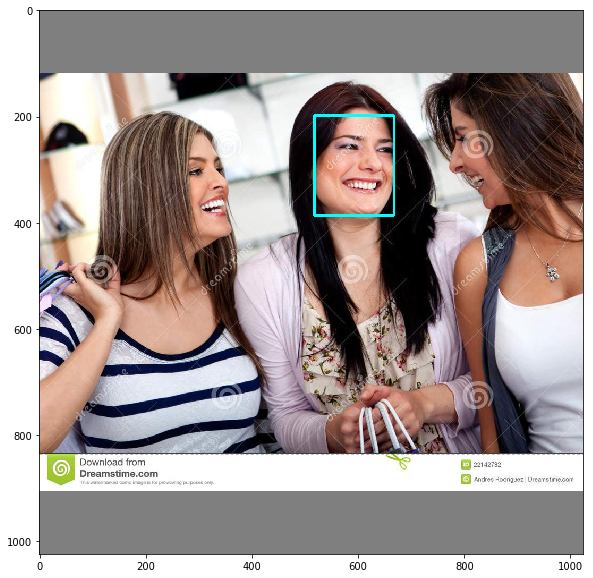

In [67]:
img = cv2.imread('./data/WIDER_val/images/23--Shoppers/23_Shoppers_Shoppers_23_259.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img, (pad_top, pad_bottom, pad_left, pad_right) = letterbox_pad(img)

B, L, top_left_x, top_left_y, bw, bh = 2.0000,  0.0000,  518, 80, 150, 188

top_left_x = top_left_x + pad_left
top_left_y = top_left_y + pad_top

H, W, C = img.shape
print(H, W)
bottom_right_x = top_left_x + bw
bottom_right_y = top_left_y + bh

print(top_left_x, top_left_y, bottom_right_x, bottom_right_y)

top_left_coords = top_left_x, top_left_y
# top_left_coords = 100, 200
bottom_right_coords = bottom_right_x, bottom_right_y
# bottom_right_coords = 300, 400
print(top_left_coords, bottom_right_coords)
cv2.rectangle(img, top_left_coords, bottom_right_coords, (0, 255, 255), 3)

plt.figure(figsize=(10, 10))
plt.imshow(img)

In [ ]:
# ! cp /home/vladimir/PyTorch-YOLOv3/data/coco/images/val2014/COCO_val2014_000000092543.jpg ./

# '/home/vladimir/PyTorch-YOLOv3/data/coco/images/val2014/COCO_val2014_000000540469.jpg', 
# '/home/vladimir/PyTorch-YOLOv3/data/coco/images/val2014/COCO_val2014_000000463618.jpg', 
# '/home/vladimir/PyTorch-YOLOv3/data/coco/images/val2014/COCO_val2014_000000092543.jpg')
# targets 
# tensor([[ 0.0000, 37.0000,  0.3425,  0.7006,  0.2527,  0.0898],
#         [ 0.0000,  0.0000,  0.4857,  0.4737,  0.6151,  0.4413],
#         [ 1.0000, 62.0000,  0.6833,  0.2446,  0.4339,  0.1869],
#         [ 1.0000, 14.0000,  0.7664,  0.5047,  0.1376,  0.1346],
#         [ 1.0000, 57.0000,  0.1318,  0.3852,  0.2636,  0.4733],
#         [ 1.0000,  0.0000,  0.4073,  0.5028,  0.4478,  0.6808],
#         [ 1.0000,  0.0000,  0.4967,  0.5625,  0.2727,  0.3840],
#         [ 2.0000, 10.0000,  0.2710,  0.6109,  0.4810,  0.5519],
#         [ 2.0000,  0.0000,  0.6921,  0.4621,  0.5748,  0.6939]])

In [5]:
import cv2

img = cv2.imread('./COCO_val2014_000000463618.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.flip(img, 1)
img, _ = letterbox_pad(img)

# bw, bh are with padding
B, L, cx, cy, bw, bh = 1.0000, 0.0000,  0.4073,  0.5028,  0.4478,  0.6808

H, W, C = img.shape
print(H, W)
top_left_x = int(cx * W) - int((bw * W)//2)
top_left_y = int(cy * H) - int((bh * H)//2)
bottom_right_x = int(cx * W) + int((bw * W)//2)
bottom_right_y = int(cy * H) + int((bh * H)//2)

print(top_left_x, top_left_y, bottom_right_x, bottom_right_y)

top_left_coords = top_left_x, top_left_y
# top_left_coords = 100, 200
bottom_right_coords = bottom_right_x, bottom_right_y
# bottom_right_coords = 300, 400
print(top_left_coords, bottom_right_coords)
cv2.rectangle(img, top_left_coords, bottom_right_coords, (255, 255, 255), 3)

plt.figure(figsize=(10, 10))
plt.imshow(img)

640 640
117 104 403 538
(117, 104) (403, 538)


NameError: name 'plt' is not defined

In [1]:
train_meta

NameError: name 'train_meta' is not defined

In [1]:
import torch

In [15]:
a = torch.rand((10, 13))
a[:, 0] = 0
b, c = a[:, :2].t()
print(a[:, :2].t().shape)
b.shape, c.shape

torch.Size([2, 10])


(torch.Size([10]), torch.Size([10]))

In [ ]:
train.py --n_cpu 2 

In [ ]:
train.py [-h] [--epochs EPOCHS] [--batch_size BATCH_SIZE]
                [--gradient_accumulations GRADIENT_ACCUMULATIONS]
                [--model_config_path MODEL_CONFIG_PATH]
                [--data_config_path DATA_CONFIG_PATH]
                [--weights_path WEIGHTS_PATH] [--class_path CLASS_PATH]
                [--n_cpu N_CPU] [--img_size IMG_SIZE]
                [--checkpoint_interval CHECKPOINT_INTERVAL]
                [--compute_map COMPUTE_MAP]
                [--multi_scale_training MULTI_SCALE_TRAINING]

In [ ]:
10,13,  16,30,  33,23

In [8]:
116 / (416 / 48)

13.384615384615385

In [11]:
for a in [  116,90,  156,198,  373,326, 30,61,  62,45,  59,119, 10,13,  16,30,  33,23,]:
    print(a / (416 / 13), a / (416 / 26), a / (416 / 52))

3.625 7.25 14.5
2.8125 5.625 11.25
4.875 9.75 19.5
6.1875 12.375 24.75
11.65625 23.3125 46.625
10.1875 20.375 40.75
0.9375 1.875 3.75
1.90625 3.8125 7.625
1.9375 3.875 7.75
1.40625 2.8125 5.625
1.84375 3.6875 7.375
3.71875 7.4375 14.875
0.3125 0.625 1.25
0.40625 0.8125 1.625
0.5 1.0 2.0
0.9375 1.875 3.75
1.03125 2.0625 4.125
0.71875 1.4375 2.875


In [ ]:
[ 3.6250,  2.8125],
[ 4.8750,  6.1875],
[11.6562, 10.1875],

[1.8750, 3.8125],
[3.8750, 2.8125],
[3.6875, 7.4375],

[1.2500, 1.6250],
[2.0000, 3.7500],
[4.1250, 2.8750],

In [1]:
import torch
(torch.tensor(2.923).long())

tensor(2)

In [6]:
gxy = torch.arange(10).view(5, 2)
print(gxy)
a, b = gxy.t()
print(a, b)

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])
tensor([0, 2, 4, 6, 8]) tensor([1, 3, 5, 7, 9])
